# ADVANCED ANALISYS (ANÁLISIS AVANZADOS)

El objetivo de esta sección es realizar análisis de alto nivel, aplicando técnicas de EDA avanzadas, cómo PCA o Clusterización.

<br>

Se encarga de responder preguntas como:
- ¿Existen grupos de vinos definidos por ciertas variables?
- ¿Existe una buena combinación de variables que sea capaza de describir a los mejores vinos?
- ¿Qué variables son las más importantes para describir a un vino?

<br>

---

## Configuración General

1. Carga de librerías.
2. Seteo de estilos del notebook.
3. Ingesta del dataset.

In [1]:
import sys
import os
import statistics

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



sys.path.append(os.path.abspath(os.path.join('..', '..', 'src', 'utils')))
import utils as ut

In [2]:
# Seteo de estilos
plt.style.use("ggplot")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (9,6)

In [3]:
wines = pd.read_csv("../../src/data/transformed/wines_clean.csv")
pd.set_option('display.max_columns', None)
wines.head(3)

,wine_link,name,year,winery,rating,rating_qty,price,body,tannis,sweetness,acidity,style,alcohol,image,ageing,black fruit,citrus,dried fruit,earthy,floral,oaky,red fruit,spices,tree fruit,tropical,vegetal,yeasty,any junk food will do,aperitif,appetizers and snacks,beef,blue cheese,cured meat,"game (deer, venison)",goat's milk cheese,lamb,lean fish,mature and hard cheese,mild and soft cheese,mushrooms,pasta,pork,poultry,"rich fish (salmon, tuna etc)",shellfish,spicy food,veal,vegetarian,Albariño,Barbera,Bonarda,Béquignol Noir,Cabernet Franc,Cabernet Sauvignon,Cereza,Chardonnay,Chenin Blanc,Criolla Grande,Garnacha,Gewürztraminer,Grenache,Grüner Veltliner,Malbec,Malvasia,Marsanne,Mencia,Merlot,Moscatel,Mourvedre,Pais,Pedro Ximenez,Petit Verdot,Pinot Gris,Pinot Noir,Riesling,Roussanne,Sangiovese,Sauvignon Blanc,Shiraz/Syrah,Sémillon,Tannat,Tempranillo,Torrontés,Trousseau,Verdejo,Viognier,Agrelo,Argentina,Brazil,Cafayate Valley,Calchaqui Valley,Campanha,Famatina,Gualtallary,La Consulta,La Rioja,Las Compuertas,Lujan de Cuyo,Lunlunta,Maipu,Mendoza,Paraje Altamira,Patagonia,Pedernal Valley,Perdriel,Rio Grande do Sul,Rio Negro,Salta,San Carlos,San Juan,San Rafael,Serra Gaúcha,Tulum Valley,Tunuyán,Tupungato,Uco Valley,Vale dos Vinhedos,Vista Flores
0,https://www.vivino.com/US/en/luigi-bosca-parai...,Paraiso,2020.0,Luigi Bosca,4.8,582.0,188.33,0.7343,0.5090,0.1361,0.4474,Argentinian Cabernet Sauvignon - Malbec,0.1410,https://images.vivino.com/thumbs/_Bf6JTwYRpSX6...,0.0000,0.3500,0.000,0.000,0.1250,0.0500,0.3250,0.0500,0.1000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2015.0,Catena Zapata,4.7,297.0,675.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,0.1400,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.008,0.012,0.0964,0.0241,0.4378,0.0843,0.1004,0.0,0.0,0.004,0.008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2017.0,Catena Zapata,4.7,219.0,580.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,0.1416,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.008,0.012,0.0964,0.0241,0.4378,0.0843,0.1004,0.0,0.0,0.004,0.008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Maricel, esto es lo que te decía de la selección de variables para después aplicar en el modelo
# Está bueno para leer (fijate si lo podés traducir)
# Feature Selection: https://scikit-learn.org/stable/modules/feature_selection.html

## 01 | Clusters

### Perfil de Sabor

**Distintos Tipos de Clustering**

- Objetivo: buscar diferentes metodologías (Clases y Funciones) para clusterizar.

**Formas de Ver la Mejor Cantidad de Clusters**

-  Objetivo: buscar diferentes metodologías para encontrar la cantidad de clusters óptima (el K que genera clusters más homogéneos).

**Interpretabilidad de los Clusters**

- Objetivo: darle interpretabilidad a los clusters revisando Mínimos, Máximos, Medias, Medianas, Etc de las diferentes variables que componen el cluster para así poder interpretarlo facilmente.

**Cruce con Variables**

- Objetivo: relacionar los clusters con variables Rating, Price, Precio-Calidad para notar mejores y peores clusters de vinos de acuerdo a estas variables.

### Funciones

In [5]:
# Función para visualizar los centroides de clusters con sus características sin PCA

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html

def viz_cluster(features_df=None, cluster_algorithm=None, var_name="Variable"):
    cluster_centers_df = pd.DataFrame(cluster_algorithm.cluster_centers_, columns=features_df.columns)
    cluster_centers_df = pd.melt(cluster_centers_df, var_name=var_name, value_name="centroids", ignore_index=False)
    note_order = cluster_centers_df.groupby(by=var_name)["centroids"].max().sort_values(ascending=False).index


    fig, ax = plt.subplots(figsize=(9,6))
    sns.barplot(
        data=cluster_centers_df,
        x=var_name,
        y="centroids",
        hue=cluster_centers_df.index,
        palette="flare",
        order=note_order
        )
    ax.set_title(f"Valor de Cluster por {var_name}")

    for bar in ax.patches[:-2]:
        label = bar.get_height()
        if label > 0.001:
            ax.text(
                x = bar.get_x() + bar.get_width() / 2,
                y = label + 0.01,
                s = f"{round(label*100)}%",
                ha = "center",
                va = "bottom",
                fontsize=6
            )

    ax.set_xlabel(f"{var_name}")
    ax.set_ylabel("Valor")
    ax.legend(title="Cluster")
    plt.setp(ax.get_xticklabels(), rotation=45)
    return fig

In [6]:
# Función para visualizar clusters tras aplicar PCA

# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

from sklearn.decomposition import PCA
import plotly.express as px

def pca_viz_cluster(n_components=2, features=None, cluster_algorithm=None, var_name=""):
    """
    Permite visualizar las características clusterizadas tras aplicarles PCA.

    Atributos:
    - n_components: cantidad de componentes principales en los cuales reducir las características (2 o 3).
    - features: dataframe o array de características a visualizar.
    - cluster_algorithm: objeto del modelo de clustering utilizado.
    - var_name: nombre a utilizar para referirse a la variable analizada.

    Return:
    - Devuelve un gráfico de scatterplot con los clusters definidos y sus centroides.
    """

    if type(features) == pd.DataFrame:
        features = np.array(features)

    pca = PCA(n_components=n_components)
    notes_pca = pca.fit_transform(features)
    centers = pca.transform(cluster_algorithm.cluster_centers_)

    if n_components==2:
        notes_pca_df = pd.DataFrame(notes_pca, columns= ["PC1", "PC2"])
        notes_pca_df["cluster"] = cluster_algorithm.labels_
        
        fig, ax = plt.subplots(figsize=(9,6))
        sns.scatterplot(data=notes_pca_df, x="PC1", y="PC2", hue="cluster", palette="flare")
        ax.scatter(centers[:,0], centers[:,1], c="blue", s=100, marker="x", label="Centroides")
        ax.set_title(f"Visualización de Clusters PCA {var_name}")
        ax.set_xlabel(f"Componente Principal 1 {var_name}")
        ax.set_ylabel(f"Componente Principal 2 {var_name}")
        ax.legend(title="Clusters")
        return fig
    
    elif n_components==3:
        notes_pca_df = pd.DataFrame(notes_pca, columns= ["PC1", "PC2", "PC3"])
        notes_pca_df["cluster"] = cluster_algorithm.labels_
        fig = px.scatter_3d(
            data_frame=notes_pca_df,
            x="PC1",
            y="PC2",
            z= "PC3",
            width=800,
            height=600,
            color=notes_pca_df["cluster"]
        )
        fig.update_layout(title=f"Visualización de Clusters PCA {var_name}")
        return fig

__Resumen de Métricas de Evaluación de Clusters__

| Métrica               | Qué mide                                                 | Cuanto más...   | Ideal      |
| --------------------- | -------------------------------------------------------- | --------------- | ---------- |
| **Silhouette Score**  | Separación y cohesión (distancia entre e intra clusters) | **alto**, mejor | Cerca de 1 |
| **Davies-Bouldin**    | Similitud entre clusters (relación centro-dispersión)    | **bajo**, mejor | Cerca de 0 |
| **Calinski-Harabasz** | Variación entre clusters vs dentro de ellos              | **alto**, mejor | Grande     |


In [7]:
# Función para evaluar efectividad del clustering

# https://scikit-learn.org/stable/api/sklearn.metrics.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

def eval_cluster(X, labels):
    """
    Calcula métricas de performance de clusters.

    Atributos:
    - X: Matriz de variables utilizadas para clusterizar.
    - labels: Array de clusters calculado a partir de X.

    Return:
    - Devuelve un diccionario con las métricas "Silhouette", "DB Score" y "CH Score".
    """

    return {
        "Silhouette": silhouette_score(X, labels),
        "DB Score": davies_bouldin_score(X, labels),
        "CH Score": calinski_harabasz_score(X, labels),
    }

### Notas

__Kmeans__

In [46]:
from sklearn.cluster import KMeans

notes = pd.read_csv("../../src/data/processed/aux/notes.csv")
notes = notes["notes"]
notes = wines[notes].copy()
notes_array = np.array(notes)

__Resumen de Métricas de Evaluación de Clusters__

| Métrica               | Qué mide                                                 | Cuanto más...   | Ideal      |
| --------------------- | -------------------------------------------------------- | --------------- | ---------- |
| **Silhouette Score**  | Separación y cohesión (distancia entre e intra clusters) | **alto**, mejor | Cerca de 1 |
| **Davies-Bouldin**    | Similitud entre clusters (relación centro-dispersión)    | **bajo**, mejor | Cerca de 0 |
| **Calinski-Harabasz** | Variación entre clusters vs dentro de ellos              | **alto**, mejor | Grande     |


In [47]:
X = notes_array
results = []

for k in range(2,11):
    kmeans_notes = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(notes_array)
    labels = kmeans_notes.labels_
    note_eval = eval_cluster(X, labels)
    note_eval["k"] = k
    results.append(note_eval)

note_eval_df = pd.DataFrame(results)
   
note_eval_df

,Silhouette,DB Score,CH Score,k
0,0.554807,0.998278,1157.236698,2
1,0.552339,0.963485,999.803361,3
2,0.527471,1.098182,795.750833,4
3,0.548136,0.913489,713.375309,5
4,0.290410,1.131896,700.084292,6
5,0.288366,1.168800,651.528801,7
6,0.278001,1.259158,592.597127,8
7,0.286911,1.161221,567.992734,9
8,0.292971,1.125934,530.563499,10


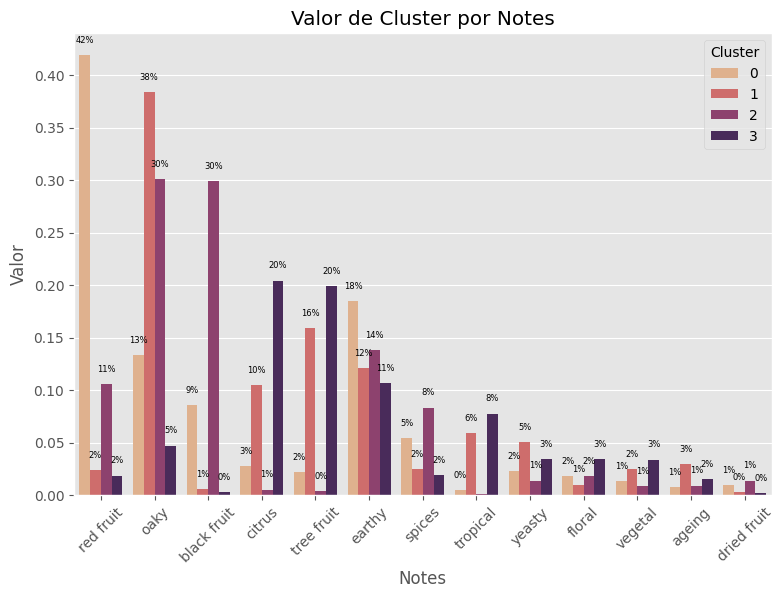

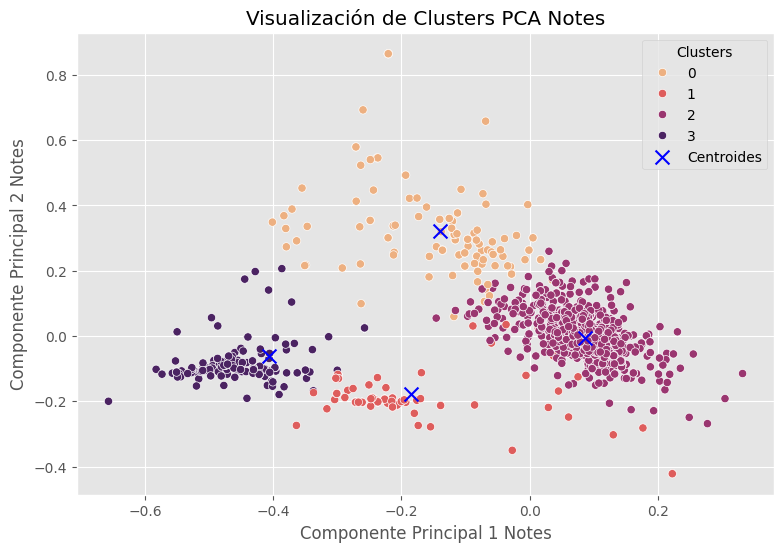

In [50]:
# K seleccionado: 4
kmeans_notes = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(notes_array)

note_bars = viz_cluster(notes, kmeans_notes, "Notes")
plt.show()

fig = pca_viz_cluster(2, notes_array, kmeans_notes, var_name="Notes")
plt.show()

**Distintos Tipos de Clustering**

- Objetivo: buscar diferentes metodologías (Clases y Funciones) para clusterizar.

**Formas de Ver la Mejor Cantidad de Clusters**

-  Objetivo: buscar diferentes metodologías para encontrar la cantidad de clusters óptima (el K que genera clusters más homogéneos).

**Interpretabilidad de los Clusters**

- Objetivo: darle interpretabilidad a los clusters revisando Mínimos, Máximos, Medias, Medianas, Etc de las diferentes variables que componen el cluster para así poder interpretarlo facilmente.

**Cruce con Variables**

- Objetivo: relacionar los clusters con variables Rating, Price, Precio-Calidad para notar mejores y peores clusters de vinos de acuerdo a estas variables.

### Maridajes

**Distintos Tipos de Clustering**

- Objetivo: buscar diferentes metodologías (Clases y Funciones) para clusterizar.

**Formas de Ver la Mejor Cantidad de Clusters**

-  Objetivo: buscar diferentes metodologías para encontrar la cantidad de clusters óptima (el K que genera clusters más homogéneos).

**Interpretabilidad de los Clusters**

- Objetivo: darle interpretabilidad a los clusters revisando Mínimos, Máximos, Medias, Medianas, Etc de las diferentes variables que componen el cluster para así poder interpretarlo facilmente.

**Cruce con Variables**

- Objetivo: relacionar los clusters con variables Rating, Price, Precio-Calidad para notar mejores y peores clusters de vinos de acuerdo a estas variables.

---

## 02 | Clusters + Reducción de Dimensionalidad (PCA)

### Perfil de Sabor

**Distintos Tipos de Clustering**

- Objetivo: buscar diferentes metodologías (Clases y Funciones) para clusterizar.

**Formas de Ver la Mejor Cantidad de Clusters**

-  Objetivo: buscar diferentes metodologías para encontrar la cantidad de clusters óptima (el K que genera clusters más homogéneos).

**Interpretabilidad de los Clusters**

- Objetivo: darle interpretabilidad a los clusters revisando Mínimos, Máximos, Medias, Medianas, Etc de las diferentes variables que componen el cluster para así poder interpretarlo facilmente.

**Cruce con Variables**

- Objetivo: relacionar los clusters con variables Rating, Price, Precio-Calidad para notar mejores y peores clusters de vinos de acuerdo a estas variables.

### Notas

**Distintos Tipos de Clustering**

- Objetivo: buscar diferentes metodologías (Clases y Funciones) para clusterizar.

**Formas de Ver la Mejor Cantidad de Clusters**

-  Objetivo: buscar diferentes metodologías para encontrar la cantidad de clusters óptima (el K que genera clusters más homogéneos).

**Interpretabilidad de los Clusters**

- Objetivo: darle interpretabilidad a los clusters revisando Mínimos, Máximos, Medias, Medianas, Etc de las diferentes variables que componen el cluster para así poder interpretarlo facilmente.

**Cruce con Variables**

- Objetivo: relacionar los clusters con variables Rating, Price, Precio-Calidad para notar mejores y peores clusters de vinos de acuerdo a estas variables.

### Maridaje

**Distintos Tipos de Clustering**

- Objetivo: buscar diferentes metodologías (Clases y Funciones) para clusterizar.

**Formas de Ver la Mejor Cantidad de Clusters**

-  Objetivo: buscar diferentes metodologías para encontrar la cantidad de clusters óptima (el K que genera clusters más homogéneos).

**Interpretabilidad de los Clusters**

- Objetivo: darle interpretabilidad a los clusters revisando Mínimos, Máximos, Medias, Medianas, Etc de las diferentes variables que componen el cluster para así poder interpretarlo facilmente.

**Cruce con Variables**

- Objetivo: relacionar los clusters con variables Rating, Price, Precio-Calidad para notar mejores y peores clusters de vinos de acuerdo a estas variables.

---

## 03 | Cruce entre Clusters

- Objetivo: ver si existen relaciones entre ciertos clusters y otros que describan los mejores y peores vinos.

### Sin Reducción de Dimensionalidad (PCA)

**Cluster Perfil de Sabor vs Cluster Notas**

**Cluster Perfil de Sabor vs Cluster Maridaje**

**Cluster Notas vs Cluster Maridaje**

### Con Reducción de Dimensionalidad (PCA)

**Cluster Perfil de Sabor vs Cluster Notas**

**Cluster Perfil de Sabor vs Cluster Maridaje**

**Cluster Notas vs Cluster Maridaje**

---